In [1]:
pwd

'C:\\Users\\Sam Cannon\\Desktop\\Python\\SIOP 2020'

In [147]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
import missingno as msno
pd.set_option('display.max_colwidth', -1)

In [159]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\Data Sets')

In [160]:
data = pd.read_csv('heather_clean_data.csv')

In [161]:
data.drop(data.columns[data.columns.str.contains('Unnamed') == True], axis = 1, inplace = True)

In [162]:
data1 = data.loc[:, 'Learning_1':'Support']
data2 = data.loc[:, 'Belong_1':'Turnover_3']
df = pd.concat([data1, data2], axis = 1)

In [163]:
df.head()

,Learning_1,Learning_2,Learning_3,Learning_4,Learning_5,Learning_6,Learning_7,Learning_8,Learn_1,Learn_2,Support,Belong_1,Belong_2,Belong_3,Belong_4,Belong_5,Belong_6,Belong_7,Belong_8,Auth_1,Auth_2,Auth_3,Auth_4,Auth_5,Auth_6,Auth_7,Auth_8,Turnover_1,Turnover_2,Turnover_3
0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,6.0,6.0,2.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0
1,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,5.0,5.0,5.0
2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,3.0,2.0
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,6.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0


In [129]:
# profile = measure_data.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="measure_report.html")

In [130]:
# Printing the percentage of missing values per column
def percent_missing(dataframe):
    '''
    Prints the percentage of missing values for each column in a dataframe
    '''
    # Summing the number of missing values per column and then dividing by the total
    sumMissing = dataframe.isnull().values.sum(axis=0)
    pctMissing = sumMissing / dataframe.shape[0]
    
    if sumMissing.sum() == 0:
        print('No missing values')
    else:
        # Looping through and printing out each columns missing value percentage
        print('Percent Missing Values:', '\n')
        for idx, col in enumerate(dataframe.columns):
            if sumMissing[idx] > 0:
                print('{0}: {1:.2f}%'.format(col, pctMissing[idx] * 100))

In [164]:
percent_missing(df)
df.shape

Percent Missing Values: 

Learning_1: 15.60%
Learning_2: 15.60%
Learning_3: 16.11%
Learning_4: 15.86%
Learning_5: 17.14%
Learning_6: 15.60%
Learning_7: 15.60%
Learning_8: 15.60%
Learn_1: 15.60%
Learn_2: 15.86%
Support: 15.60%
Belong_1: 16.11%
Belong_2: 16.11%
Belong_3: 16.37%
Belong_4: 17.14%
Belong_5: 16.88%
Belong_6: 17.65%
Belong_7: 16.62%
Belong_8: 16.62%
Auth_1: 16.11%
Auth_2: 16.37%
Auth_3: 16.37%
Auth_4: 16.62%
Auth_5: 16.62%
Auth_6: 16.37%
Auth_7: 16.37%
Auth_8: 16.11%
Turnover_1: 15.35%
Turnover_2: 15.60%
Turnover_3: 15.60%


(391, 30)

In [165]:
#drop NAs
df.dropna(inplace = True)
percent_missing(df)
df.reset_index(drop = True, inplace = True)
df.shape

No missing values


(295, 30)

In [166]:
#mean, std for learning
df['learning_mean'] = df.loc[:, 'Learning_1':'Learn_2'].mean(axis = 1)
df['learning_std'] = round(df.loc[:, 'Learning_1':'Learn_2'].std(axis = 1), 3)

#mean, std for Turnover
df['turnover_mean'] = df.loc[:, 'Turnover_1':'Turnover_3'].mean(axis = 1)
df['turnover_std'] = round(df.loc[:, 'Turnover_1':'Turnover_3'].std(axis = 1), 3)

#mean, std for authenticity and belonging 
df['belonging_auth_mean'] = df.loc[:, 'Belong_1':'Auth_8'].mean(axis = 1)
df['belonging_auth_std'] = round(df.loc[:, 'Belong_1':'Auth_8'].std(axis = 1), 3)

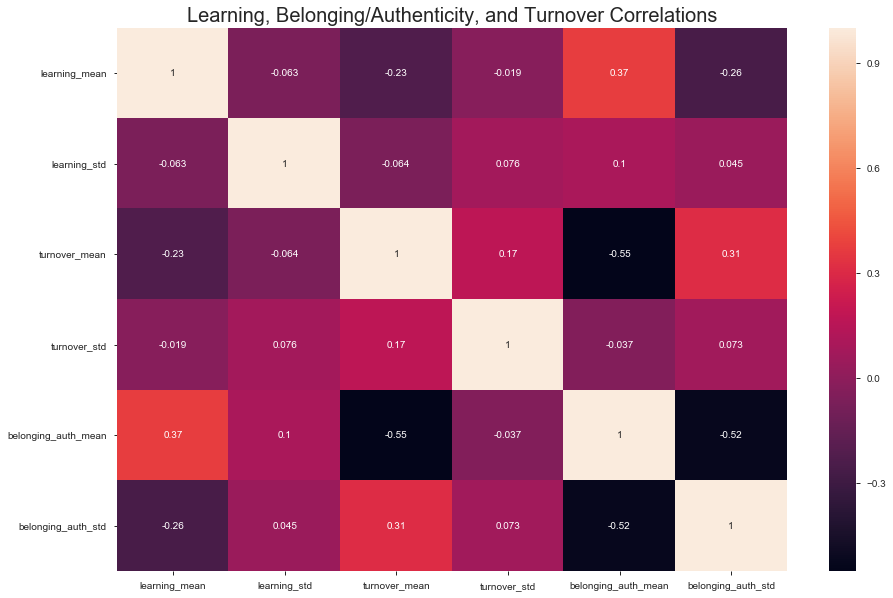

In [144]:
#correlate data from means and stds gathered above 
corr_data = df.loc[:, 'learning_mean':'belonging_auth_std']

#plot the heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(corr_data.corr(), annot = True)
plt.title('Learning, Belonging/Authenticity, and Turnover Correlations', fontsize = 20);

In [167]:
df.head()

,Learning_1,Learning_2,Learning_3,Learning_4,Learning_5,Learning_6,Learning_7,Learning_8,Learn_1,Learn_2,Support,Belong_1,Belong_2,Belong_3,Belong_4,Belong_5,Belong_6,Belong_7,Belong_8,Auth_1,Auth_2,Auth_3,Auth_4,Auth_5,Auth_6,Auth_7,Auth_8,Turnover_1,Turnover_2,Turnover_3,learning_mean,learning_std,turnover_mean,turnover_std,belonging_auth_mean,belonging_auth_std
0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,6.0,6.0,2.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,2.6,1.838,1.0,0.0,3.8750,0.619
1,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,5.0,5.0,5.0,2.6,0.516,5.0,0.0,1.8125,0.655
2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,3.0,2.0,4.2,0.422,2.0,1.0,4.5000,0.516
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,4.0,0.000,2.0,0.0,4.0000,0.000
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,6.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,3.6,1.265,2.0,0.0,4.5000,0.516


In [170]:
#get chronbachs alpha for subsets of measures
def cronbach_alpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))

In [176]:
#get alpha for "learning" variables
learning_alpha = cronbach_alpha(df.loc[:, 'Learning_1':'Learn_2'])
print(f"Cronbach's Alpha for Learning: {learning_alpha}")

print('  ')

#get alpha for "Turnover"
turnover_alpha = cronbach_alpha(df.loc[:, 'Turnover_1':'Turnover_3'])
print(f"Cronbach's Alpha for Turnover: {turnover_alpha}")

print('   ')

#get alpha for belonging and authenticity
belonging_alpha = cronbach_alpha(df.loc[:, 'Belong_1':'Auth_8'])
print(f"Cronbach's Alpha for Belonging and Authenticity: {belonging_alpha}")

Cronbach's Alpha for Learning: 0.9180813436793731
  
Cronbach's Alpha for Turnover: 0.911591003460207
   
Cronbach's Alpha for Belonging and Authenticity: 0.9758602563473152


In [199]:
#using bartlett test to confirm that we should use a factor analysis, 0 p value indicates we should
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
features = df.drop(['Support', 'learning_mean', 'learning_std', 'turnover_mean', 'turnover_std', 'belonging_auth_mean', 'belonging_auth_std'], axis = 1)

chi_square_value,p_value=calculate_bartlett_sphericity(features)
chi_square_value, p_value

(41251.47109517032, 0.0)

In [202]:
#KMO test, values above 60 are great and indicate that the data is stable enough for a factor analysis
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(features)
kmo_model

0.9388474211411635

In [206]:
#import factor analyzer package and model
from factor_analyzer import FactorAnalyzer

#instantiate the model
fa = FactorAnalyzer(rotation=None)
fa.fit(features)

#create a dataframe with factor loadings 
FactorAnalyzer(method='ml', n_factors=3, rotation=None, use_smc=True)
loadings = pd.DataFrame(fa.loadings_)
loadings.index = features.columns
loadings.columns = ['factor_1', 'factor_2', 'factor_3']
loadings

,factor_1,factor_2,factor_3
Learning_1,0.461122,0.707365,-0.015218
Learning_2,0.496062,0.744796,-0.003737
Learning_3,0.473706,0.764693,-0.011767
Learning_4,0.430397,0.775320,-0.014452
Learning_5,0.478081,0.725682,-0.030621
Learning_6,0.454664,0.781685,0.018646
Learning_7,0.480949,0.751926,0.017681
Learning_8,0.464094,0.717702,0.007017
Learn_1,0.440150,0.066093,-0.065560
Learn_2,0.412973,0.051857,-0.084961


In [183]:
#commonalities
fa.get_communalities()

array([0.7132297 , 0.80081164, 0.80929103, 0.7865717 , 0.75611316,
       0.81809775, 0.79701672, 0.73052855, 0.20239816, 0.18045431,
       0.73037801, 0.7127487 , 0.71885317, 0.57168081, 0.66535635,
       0.65554816, 0.63256341, 0.67590923, 0.76231401, 0.77093703,
       0.74192591, 0.77983996, 0.74942195, 0.79369428, 0.82742794,
       0.83081561, 0.71370458, 0.78587282, 0.74836099])

In [188]:
features.to_csv('factor_analysis_data.csv')